In [3]:
# Imports
import pandas as pd
import geopandas as gpd
import datetime
from datetime import date
import numpy as np

In [4]:
locust_gdf = gpd.read_file("git/Locust-Covid19/my_package/data/input/Swarm_Master.shp")

shp0_Kenya = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_KEN_0.shp")
shp0_Ethiopia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_ETH_0.shp")
shp0_Somalia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_SOM_0.shp")
shp0_Uganda = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_UGA_0.shp")

shp1_Kenya = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_KEN_1.shp")
shp1_Ethiopia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_ETH_1.shp")
shp1_Somalia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_SOM_1.shp")
shp1_Uganda = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_UGA_1.shp")

shp2_Kenya = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_KEN_2.shp")
shp2_Ethiopia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_ETH_2.shp")
shp2_Somalia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_SOM_2.shp")
shp2_Uganda = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_UGA_2.shp")

gdf_countries_list = [shp0_Kenya, shp0_Ethiopia, shp0_Somalia, shp0_Uganda]
countries = gpd.GeoDataFrame(pd.concat(gdf_countries_list, ignore_index=True))
shapefile_table = gpd.read_file("git/Locust-Covid19/my_package/data/output/shapefile_table.shp")

district_level = [shp2_Kenya, shp2_Ethiopia, shp2_Somalia, shp2_Uganda]
gdf_districts = gpd.GeoDataFrame(pd.concat(district_level, ignore_index=True))
gdf_districts.crs = {"init": "epsg:4326"}

In [5]:
print(locust_gdf.head())

   OBJECTID   STARTDATE TmSTARTDAT  FINISHDATE TmFINISHDA EXACTDATE PARTMONTH  \
0         1  1985-11-30      12:00  1985-11-30      12:00        No      Late   
1         2  1985-11-26      12:00  1985-11-26      12:00        No      Late   
2         3  1985-11-27      12:00  1985-11-27      12:00        No      Late   
3         4  1985-11-30      12:00  1985-11-30      12:00        No      Late   
4         5  1985-10-15      12:00  1985-10-15      12:00       Yes      None   

  LOCNAME  AREAHA LOCRELIAB  ... CTLARTREA  CTLARTREAU CTLAPPHAND CTLAPPVEHI  \
0    None     0.0     Exact  ...       0.0        None        0.0        0.0   
1    None     0.0     Exact  ...       0.0        None        0.0        0.0   
2    None     0.0     Exact  ...       0.0        None        0.0        0.0   
3    None     0.0     Exact  ...       0.0        None        0.0        0.0   
4    None     0.0     Exact  ...       0.0        None        0.0        0.0   

   CTLAPPAIR  CTLAPPMECH  CTLAPP

In [6]:
print(locust_gdf.columns)

Index(['OBJECTID', 'STARTDATE', 'TmSTARTDAT', 'FINISHDATE', 'TmFINISHDA',
       'EXACTDATE', 'PARTMONTH', 'LOCNAME', 'AREAHA', 'LOCRELIAB',
       ...
       'CTLARTREA', 'CTLARTREAU', 'CTLAPPHAND', 'CTLAPPVEHI', 'CTLAPPAIR',
       'CTLAPPMECH', 'CTLAPPUNK', 'CTLESTKILL', 'CAT', 'geometry'],
      dtype='object', length=151)


In [7]:
# Filter dates
#Transform column to datetime
locust_gdf['STARTDATE'] = pd.to_datetime(locust_gdf['STARTDATE'])

# Filter date
locust_gdf_filtered = locust_gdf[(locust_gdf['STARTDATE']>pd.Timestamp(2000,1,1)) & (locust_gdf['STARTDATE']<pd.Timestamp.today())]

In [8]:
locust_gdf_filtered.head()

OBJECTID  STARTDATE TmSTARTDAT  FINISHDATE TmFINISHDA EXACTDATE  \
11881     11882 2000-03-22      00:00  2000-03-22      00:00       Yes   
11882     11883 2000-01-28      00:00  2000-01-28      00:00       Yes   
11883     11884 2000-11-22      00:00  2000-11-22      00:00       Yes   
11884     11885 2000-11-23      00:00  2000-11-23      00:00       Yes   
11885     11886 2000-11-24      00:00  2000-11-24      00:00       Yes   

      PARTMONTH LOCNAME  AREAHA LOCRELIAB  ... CTLARTREA  CTLARTREAU  \
11881        NA    None     0.0     Exact  ...       0.0        None   
11882        NA    None     0.0     Exact  ...       0.0        None   
11883        NA    None  1860.0     Exact  ...       0.0        None   
11884        NA    None   400.0     Exact  ...       0.0        None   
11885        NA    None     6.0     Exact  ...       0.0        None   

      CTLAPPHAND CTLAPPVEHI  CTLAPPAIR  CTLAPPMECH  CTLAPPUNK  CTLESTKILL  \
11881        0.0        0.0        0.0         0.0        0.0         0.0   
11882        0.0        0.0        0.0         0.0        0.0         0.0   
11883        0.0        0.0        0.0         0.0        0.0         0.0   
11884        0.0        0.0        0.0         0.0        0.0         0.0   
11885        0.0        0.0        0.0         0.0        0.0         0.0   

         CAT                              geometry  
11881  Swarm  POINT Z (-16.56667 21.38333 0.00000)  
11882  Swarm  POINT Z (-11.13333 25.43333 0.00000)  
11883  Swarm  POINT Z (-14.09833 19.36667 0.00000)  
11884  Swarm  POINT Z (-13.91083 19.15250 0.00000)  
11885  Swarm  POINT Z (-13.76250 18.82722 0.00000)  

[5 rows x 151 columns]

### Filter countries

In [9]:
# Filter countries
selected_countries = ['SO', 'KE', 'ET', 'UG']
locust_gdf_filtered[locust_gdf_filtered.COUNTRYID.isin(selected_countries)]

OBJECTID  STARTDATE TmSTARTDAT  FINISHDATE TmFINISHDA EXACTDATE  \
21301     21302 2009-08-01      12:00  2009-08-01      12:00        No   
21302     21303 2009-08-03      12:00  2009-08-03      12:00        No   
21303     21304 2009-08-02      12:00  2009-08-02      12:00        No   
21304     21305 2009-07-29      12:00  2009-07-29      12:00        No   
21305     21306 2009-07-31      12:00  2009-07-31      12:00        No   
...         ...        ...        ...         ...        ...       ...   
28924     31445 2020-06-28      00:00  2020-06-28      00:00        No   
28925     31446 2020-06-28      00:00  2020-06-28      00:00        No   
28926     31447 2020-06-28      00:00  2020-06-28      00:00        No   
28927     31448 2020-06-28      00:00  2020-06-28      00:00        No   
28928     31449 2020-06-28      00:00  2020-06-28      00:00        No   

      PARTMONTH               LOCNAME  AREAHA LOCRELIAB  ... CTLARTREA  \
21301     Early            Raya Eabo2   450.0     Exact  ...       0.0   
21302     Early                  Kobo   500.0     Exact  ...       0.0   
21303     Early                 Zobil   350.0     Exact  ...       0.0   
21304      Late                  None   136.0     Exact  ...       0.0   
21305      Late            Raya Azebo   245.0     Exact  ...       0.0   
...         ...                   ...     ...       ...  ...       ...   
28924      Late  turkana county loima    60.0     Exact  ...      60.0   
28925      Late  Turkana County,Lowoi     1.0     Exact  ...       0.0   
28926      Late  Turkana County,Nomor     0.3     Exact  ...       0.0   
28927      Late           Russo Dhiqo     8.0     Exact  ...       0.0   
28928      Late  Turkana County loima   300.0     Exact  ...     300.0   

       CTLARTREAU CTLAPPHAND CTLAPPVEHI  CTLAPPAIR  CTLAPPMECH  CTLAPPUNK  \
21301        None        0.0        0.0        0.0         0.0        0.0   
21302        None        0.0        0.0        0.0         0.0        0.0   
21303        None        0.0        0.0        0.0         0.0        0.0   
21304        None        0.0        0.0        0.0         0.0        0.0   
21305        None        0.0        0.0        0.0         0.0        0.0   
...           ...        ...        ...        ...         ...        ...   
28924          ha        0.0        0.0        0.0         0.0        1.0   
28925        None        0.0        0.0        0.0         0.0        0.0   
28926        None        0.0        0.0        0.0         0.0        0.0   
28927        None        0.0        0.0        0.0         0.0        0.0   
28928          ha        0.0        0.0        0.0         0.0        1.0   

       CTLESTKILL    CAT                             geometry  
21301         0.0  Swarm  POINT Z (39.72167 12.89028 0.00000)  
21302         0.0  Swarm  POINT Z (39.60278 11.83917 0.00000)  
21303         0.0  Swarm  POINT Z (39.69000 12.17972 0.00000)  
21304         0.0  Swarm  POINT Z (39.65306 12.41833 0.00000)  
21305         0.0  Swarm  POINT Z (39.73583 12.88083 0.00000)  
...           ...    ...                                  ...  
28924         0.0  Swarm   POINT Z (35.20528 2.85722 0.00000)  
28925         0.0  Swarm   POINT Z (35.04139 2.60056 0.00000)  
28926         0.0  Swarm   POINT Z (35.03250 2.60167 0.00000)  
28927         0.0  Swarm   POINT Z (37.06944 3.32139 0.00000)  
28928         0.0  Swarm   POINT Z (35.20278 2.85694 0.00000)  

[2865 rows x 151 columns]

### Filter columns
- factID
- measureID
- dateID
- locationID
- value


In [10]:
locust_gdf_filtered = locust_gdf_filtered[['OBJECTID', 'STARTDATE', 'LOCNAME', 'AREAHA', 'LOCRELIAB', 'COUNTRYID', 'LOCUSTID', 'REPORTID', 'ACOMMENT', 'LOCPRESENT', 'geometry']]
locust_gdf_filtered.shape

(17047, 11)

In [11]:
locust_gdf_filtered.head()

OBJECTID  STARTDATE LOCNAME  AREAHA LOCRELIAB COUNTRYID  LOCUSTID  \
11881     11882 2000-03-22    None     0.0     Exact      None   16406.0   
11882     11883 2000-01-28    None     0.0     Exact      None   16084.0   
11883     11884 2000-11-22    None  1860.0     Exact      None   22501.0   
11884     11885 2000-11-23    None   400.0     Exact      None   22508.0   
11885     11886 2000-11-24    None     6.0     Exact      None   22512.0   

       REPORTID            ACOMMENT  LOCPRESENT  \
11881  MOR00-05                None         1.0   
11882  MAU00-05                None         1.0   
11883  MAU00-42  SWARM IN FORMATION         1.0   
11884  MAU00-42  SWARM IN FORMATION         1.0   
11885  MAU00-42                None         1.0   

                                   geometry  
11881  POINT Z (-16.56667 21.38333 0.00000)  
11882  POINT Z (-11.13333 25.43333 0.00000)  
11883  POINT Z (-14.09833 19.36667 0.00000)  
11884  POINT Z (-13.91083 19.15250 0.00000)  
11885  POINT Z (-13.76250 18.82722 0.00000)

### Buffer

In [12]:
cpr_gdf = locust_gdf_filtered.to_crs({'init': 'epsg:32636'})  
buffer_length_in_meters = (25 * 1000)
cpr_gdf['geometry'] = cpr_gdf.geometry.buffer(buffer_length_in_meters)
cpr_gdf['area_m'] = cpr_gdf.geometry.area

# Change again system to calculate in degrees
cpr_gdf= cpr_gdf.to_crs({'init': 'epsg:4326'})  
cpr_gdf['area_d'] = cpr_gdf.geometry.area
cpr_gdf.head()

OBJECTID  STARTDATE LOCNAME  AREAHA LOCRELIAB COUNTRYID  LOCUSTID  \
11881     11882 2000-03-22    None     0.0     Exact      None   16406.0   
11882     11883 2000-01-28    None     0.0     Exact      None   16084.0   
11883     11884 2000-11-22    None  1860.0     Exact      None   22501.0   
11884     11885 2000-11-23    None   400.0     Exact      None   22508.0   
11885     11886 2000-11-24    None     6.0     Exact      None   22512.0   

       REPORTID            ACOMMENT  LOCPRESENT  \
11881  MOR00-05                None         1.0   
11882  MAU00-05                None         1.0   
11883  MAU00-42  SWARM IN FORMATION         1.0   
11884  MAU00-42  SWARM IN FORMATION         1.0   
11885  MAU00-42                None         1.0   

                                                geometry        area_m  \
11881  POLYGON ((-16.41043 21.44622, -16.40460 21.431...  1.960343e+09   
11882  POLYGON ((-10.95489 25.50094, -10.94845 25.484...  1.960343e+09   
11883  POLYGON ((-13.93645 19.42170, -13.93154 19.406...  1.960343e+09   
11884  POLYGON ((-13.74859 19.20678, -13.74377 19.191...  1.960343e+09   
11885  POLYGON ((-13.60013 18.88049, -13.59543 18.865...  1.960343e+09   

         area_d  
11881  0.084688  
11882  0.106168  
11883  0.087759  
11884  0.087924  
11885  0.087827

### Intersections with districts

In [51]:
gdf_districts.head(2)

GID_0 NAME_0    GID_1   NAME_1 NL_NAME_1      GID_2           NAME_2  \
0   KEN  Kenya  KEN.1_1  Baringo      None  KEN.1.1_1              805   
1   KEN  Kenya  KEN.1_1  Baringo      None  KEN.1.2_1  Baringo Central   

  VARNAME_2 NL_NAME_2        TYPE_2     ENGTYPE_2 CC_2 HASC_2  \
0      None      None  Constituency  Constituency  162   None   
1      None      None  Constituency  Constituency  159   None   

                                            geometry  
0  POLYGON ((35.87727 -0.02973, 35.87699 -0.02947...  
1  POLYGON ((35.80651 0.31642, 35.80780 0.31627, ...

In [52]:
#cpr_gdf_dis1 = cpr_gdf.copy()
#cpr_gdf_dis1['intersect'] = cpr_gdf.intersection(gdf_districts.iloc[0])
#cpr_gdf_dis1 = cpr_gdf_dis1[cpr_gdf_dis1.intersect.notnull()]
##all_df[all_df['City'].isnull()]
#cpr_gdf_dis1['intersection'].dropna()
#print(cpr_gdf_dis1.shape)
#cpr_gdf_dis1.head()

In [65]:
gdf_districts_filtered = gdf_districts[['GID_2', 'geometry']]
res_intersection = gpd.overlay(cpr_gdf, gdf_districts_filtered, how='intersection')
res_intersection.head()

OBJECTID  STARTDATE       LOCNAME  AREAHA LOCRELIAB COUNTRYID  LOCUSTID  \
0     20362 2005-06-25          None    25.0     Exact      None   89054.0   
1     20363 2005-06-28  Adifitawrari     5.0     Exact      None   89241.0   
2     20364 2005-06-27        Goblel     5.0     Exact      None   89242.0   
3     20365 2005-06-26        Bombay    20.0     Exact      None   89243.0   
4     20523 2005-07-05          None    25.0     Exact      None   89048.0   

               REPORTID              ACOMMENT  LOCPRESENT        area_m  \
0              ETH05-11  25HA GROUND CONTROL;         1.0  1.960343e+09   
1  BIGRAMSES_20050712_E         5 ha treated.         1.0  1.960343e+09   
2  BIGRAMSES_20050712_E         3 ha treated.         1.0  1.960343e+09   
3  BIGRAMSES_20050712_E        10 ha treated.         1.0  1.960343e+09   
4            ORPHANS_05  GROUND CONTROL 26/06         1.0  1.960343e+09   

     area_d       GID_2                                           geometry  
0  0.163728  ETH.11.3_1  POLYGON ((36.83575 14.28638, 36.83426 14.26429...  
1  0.163338  ETH.11.3_1  POLYGON ((37.52508 14.09771, 37.52353 14.07564...  
2  0.163565  ETH.11.3_1  POLYGON ((37.05028 14.16259, 37.04878 14.14051...  
3  0.163517  ETH.11.3_1  POLYGON ((36.99354 14.06601, 36.99204 14.04392...  
4  0.163728  ETH.11.3_1  POLYGON ((36.83575 14.28610, 36.83426 14.26401...

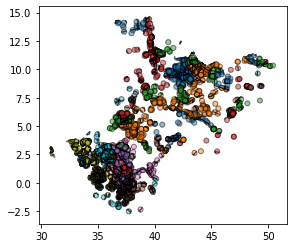

In [54]:
res_intersection.plot(alpha=0.5, edgecolor='k', cmap='tab10');

In [55]:
res_intersection['area_inter_loc_districts'] = res_intersection.geometry.area
res_intersection.head()

OBJECTID  STARTDATE       LOCNAME  AREAHA LOCRELIAB COUNTRYID  LOCUSTID  \
0     20362 2005-06-25          None    25.0     Exact      None   89054.0   
1     20363 2005-06-28  Adifitawrari     5.0     Exact      None   89241.0   
2     20364 2005-06-27        Goblel     5.0     Exact      None   89242.0   
3     20365 2005-06-26        Bombay    20.0     Exact      None   89243.0   
4     20523 2005-07-05          None    25.0     Exact      None   89048.0   

               REPORTID              ACOMMENT  LOCPRESENT        area_m  \
0              ETH05-11  25HA GROUND CONTROL;         1.0  1.960343e+09   
1  BIGRAMSES_20050712_E         5 ha treated.         1.0  1.960343e+09   
2  BIGRAMSES_20050712_E         3 ha treated.         1.0  1.960343e+09   
3  BIGRAMSES_20050712_E        10 ha treated.         1.0  1.960343e+09   
4            ORPHANS_05  GROUND CONTROL 26/06         1.0  1.960343e+09   

     area_d       GID_2                                           geometry  \
0  0.163728  ETH.11.3_1  POLYGON ((36.83575 14.28638, 36.83426 14.26429...   
1  0.163338  ETH.11.3_1  POLYGON ((37.52508 14.09771, 37.52353 14.07564...   
2  0.163565  ETH.11.3_1  POLYGON ((37.05028 14.16259, 37.04878 14.14051...   
3  0.163517  ETH.11.3_1  POLYGON ((36.99354 14.06601, 36.99204 14.04392...   
4  0.163728  ETH.11.3_1  POLYGON ((36.83575 14.28610, 36.83426 14.26401...   

   area_inter_loc_districts  
0                  0.060672  
1                  0.160901  
2                  0.140003  
3                  0.163517  
4                  0.060764

In [30]:
res_intersection['measureID'] = 5
res_intersection['factID'] = 'LOC_'
res_intersection['factID'] = res_intersection['factID'] + res_intersection['OBJECTID'].astype(str)
res_intersection['locationID'] = res_intersection['GID_2']
res_intersection['value'] = res_intersection['area_inter_loc_districts']
res_intersection['date'] = res_intersection['STARTDATE']

res_intersection.head()

OBJECTID  STARTDATE       LOCNAME  AREAHA LOCRELIAB COUNTRYID  LOCUSTID  \
0     20362 2005-06-25          None    25.0     Exact      None   89054.0   
1     20363 2005-06-28  Adifitawrari     5.0     Exact      None   89241.0   
2     20364 2005-06-27        Goblel     5.0     Exact      None   89242.0   
3     20365 2005-06-26        Bombay    20.0     Exact      None   89243.0   
4     20523 2005-07-05          None    25.0     Exact      None   89048.0   

               REPORTID              ACOMMENT  LOCPRESENT  ...    area_d  \
0              ETH05-11  25HA GROUND CONTROL;         1.0  ...  0.163728   
1  BIGRAMSES_20050712_E         5 ha treated.         1.0  ...  0.163338   
2  BIGRAMSES_20050712_E         3 ha treated.         1.0  ...  0.163565   
3  BIGRAMSES_20050712_E        10 ha treated.         1.0  ...  0.163517   
4            ORPHANS_05  GROUND CONTROL 26/06         1.0  ...  0.163728   

        GID_2                                           geometry  \
0  ETH.11.3_1  POLYGON ((36.83575 14.28638, 36.83426 14.26429...   
1  ETH.11.3_1  POLYGON ((37.52508 14.09771, 37.52353 14.07564...   
2  ETH.11.3_1  POLYGON ((37.05028 14.16259, 37.04878 14.14051...   
3  ETH.11.3_1  POLYGON ((36.99354 14.06601, 36.99204 14.04392...   
4  ETH.11.3_1  POLYGON ((36.83575 14.28610, 36.83426 14.26401...   

  area_inter_loc_districts  measureID     factID     dateID  locationID  \
0                 0.060672          5  LOC_20362 2005-06-25  ETH.11.3_1   
1                 0.160901          5  LOC_20363 2005-06-28  ETH.11.3_1   
2                 0.140003          5  LOC_20364 2005-06-27  ETH.11.3_1   
3                 0.163517          5  LOC_20365 2005-06-26  ETH.11.3_1   
4                 0.060764          5  LOC_20523 2005-07-05  ETH.11.3_1   

      value       date  
0  0.060672 2005-06-25  
1  0.160901 2005-06-28  
2  0.140003 2005-06-27  
3  0.163517 2005-06-26  
4  0.060764 2005-07-05  

[5 rows x 21 columns]

In [31]:
res_intersection = res_intersection[['factID', 'measureID', 'date', 'locationID', 'value', 'geometry']]
res_intersection.head()

factID  measureID       date  locationID     value  \
0  LOC_20362          5 2005-06-25  ETH.11.3_1  0.060672   
1  LOC_20363          5 2005-06-28  ETH.11.3_1  0.160901   
2  LOC_20364          5 2005-06-27  ETH.11.3_1  0.140003   
3  LOC_20365          5 2005-06-26  ETH.11.3_1  0.163517   
4  LOC_20523          5 2005-07-05  ETH.11.3_1  0.060764   

                                            geometry  
0  POLYGON ((36.83575 14.28638, 36.83426 14.26429...  
1  POLYGON ((37.52508 14.09771, 37.52353 14.07564...  
2  POLYGON ((37.05028 14.16259, 37.04878 14.14051...  
3  POLYGON ((36.99354 14.06601, 36.99204 14.04392...  
4  POLYGON ((36.83575 14.28610, 36.83426 14.26401...

In [32]:
dates = pd.read_csv("git/Locust-Covid19/my_package/data/input/date_23_06-2020.csv")
dates['date'] = pd.to_datetime(dates['date'])
dates.head()

dateID       date
0  20000101 2000-01-01
1  20000102 2000-02-01
2  20000103 2000-03-01
3  20000104 2000-04-01
4  20000105 2000-05-01

In [33]:
res_intersection = res_intersection.merge(dates, on='date', how='left')
res_intersection = res_intersection[['factID', 'measureID', 'dateID', 'locationID', 'value', 'geometry']]
res_intersection.head()

factID  measureID    dateID  locationID     value  \
0  LOC_20362        5.0  20050625  ETH.11.3_1  0.060672   
1  LOC_20363        5.0  20050628  ETH.11.3_1  0.160901   
2  LOC_20363        5.0  20050628  ETH.11.5_1  0.002437   
3  LOC_20364        5.0  20050627  ETH.11.3_1  0.140003   
4  LOC_20365        5.0  20050626  ETH.11.3_1  0.163517   

                                            geometry  
0  POLYGON ((36.83575 14.28638, 36.83426 14.26429...  
1  POLYGON ((37.52508 14.09771, 37.52353 14.07564...  
2  MULTIPOLYGON (((37.51671 14.16212, 37.52151 14...  
3  POLYGON ((37.05028 14.16259, 37.04878 14.14051...  
4  POLYGON ((36.99354 14.06601, 36.99204 14.04392...

In [ ]:
# Export to parquet
res_intersection.to_parquet('Area_impact_locust_fact_20200706.parquet',
              compression='uncompressed', index = False)

In [ ]:
# Export to csv
res_intersection.to_csv('Area_impact_locust_fact_20200706.csv', sep='|', encoding='utf-8', index = False)

## Croplands

### Vector approach

In [22]:
# Import cropland vector
crops = gpd.read_file("git/Locust-Covid19/my_package/data/input/crops/Crops_vectorized.shp")
print(crops.head())

   fid  Crops                                           geometry
0  1.0      0  POLYGON ((37.77539 14.67733, 37.78475 14.67696...
1  2.0      0  POLYGON ((37.79349 14.66769, 37.80286 14.66732...
2  3.0      1  POLYGON ((37.83906 14.64804, 37.84842 14.64768...
3  4.0      1  POLYGON ((37.72551 14.63462, 37.73487 14.63425...
4  5.0      1  POLYGON ((37.88462 14.62839, 37.89398 14.62803...


In [23]:
crops = crops[crops['Crops'] == 1]
crops.Crops = 12
crops.head()

fid  Crops                                           geometry
2  3.0     12  POLYGON ((37.83906 14.64804, 37.84842 14.64768...
3  4.0     12  POLYGON ((37.72551 14.63462, 37.73487 14.63425...
4  5.0     12  POLYGON ((37.88462 14.62839, 37.89398 14.62803...
5  6.0     12  POLYGON ((37.90335 14.62766, 37.91271 14.62729...
6  7.0     12  POLYGON ((37.76984 14.59717, 37.77920 14.59680...

In [66]:
crops_locust_district = gpd.overlay(crops, res_intersection, how='intersection')
crops_locust_district.head()

fid  Crops  OBJECTID  STARTDATE LOCNAME  AREAHA    LOCRELIAB COUNTRYID  \
0  25.0     12     20527 2005-06-22    None     0.0  Approximate      None   
1  26.0     12     20527 2005-06-22    None     0.0  Approximate      None   
2  29.0     12     20527 2005-06-22    None     0.0  Approximate      None   
3  35.0     12     20527 2005-06-22    None     0.0  Approximate      None   
4  61.0     12     20527 2005-06-22    None     0.0  Approximate      None   

   LOCUSTID  REPORTID              ACOMMENT  LOCPRESENT        area_m  \
0   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   
1   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   
2   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   
3   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   
4   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   

     area_d       GID_2                                           geometry  
0  0.162902  ETH.11.5_1  POLYGON ((38.33909 14.41708, 38.33888 14.41399...  
1  0.162902  ETH.11.5_1  POLYGON ((38.35816 14.42128, 38.35759 14.41324...  
2  0.162902  ETH.11.5_1  POLYGON ((38.32950 14.41408, 38.32889 14.40547...  
3  0.162902  ETH.11.5_1  POLYGON ((38.32826 14.39657, 38.33762 14.39619...  
4  0.162902  ETH.11.5_1  POLYGON ((38.42806 14.34796, 38.43742 14.34758...

In [67]:
crops_locust_district['area_inter_locust'] = crops_locust_district.geometry.area
crops_locust_district.head()

fid  Crops  OBJECTID  STARTDATE LOCNAME  AREAHA    LOCRELIAB COUNTRYID  \
0  25.0     12     20527 2005-06-22    None     0.0  Approximate      None   
1  26.0     12     20527 2005-06-22    None     0.0  Approximate      None   
2  29.0     12     20527 2005-06-22    None     0.0  Approximate      None   
3  35.0     12     20527 2005-06-22    None     0.0  Approximate      None   
4  61.0     12     20527 2005-06-22    None     0.0  Approximate      None   

   LOCUSTID  REPORTID              ACOMMENT  LOCPRESENT        area_m  \
0   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   
1   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   
2   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   
3   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   
4   89000.0  ETH05-09  DATE & COORDINATES A         1.0  1.960343e+09   

     area_d       GID_2                                           geometry  \
0  0.162902  ETH.11.5_1  POLYGON ((38.33909 14.41708, 38.33888 14.41399...   
1  0.162902  ETH.11.5_1  POLYGON ((38.35816 14.42128, 38.35759 14.41324...   
2  0.162902  ETH.11.5_1  POLYGON ((38.32950 14.41408, 38.32889 14.40547...   
3  0.162902  ETH.11.5_1  POLYGON ((38.32826 14.39657, 38.33762 14.39619...   
4  0.162902  ETH.11.5_1  POLYGON ((38.42806 14.34796, 38.43742 14.34758...   

   area_inter_locust  
0           0.000014  
1           0.000064  
2           0.000065  
3           0.000083  
4           0.000083

In [69]:
crops_locust_district['measureID'] = 30
crops_locust_district['factID'] = 'CROP_' + crops_locust_district['fid'].astype(str) + 'LOC_'+ crops_locust_district['OBJECTID'].astype(str)
crops_locust_district['locationID'] = crops_locust_district['GID_2']
crops_locust_district['value'] = crops_locust_district['area_inter_locust']
crops_locust_district['date'] = crops_locust_district['STARTDATE']

crops_locust_district.head()

fid  Crops  OBJECTID  STARTDATE LOCNAME  AREAHA    LOCRELIAB COUNTRYID  \
0  25.0     12     20527 2005-06-22    None     0.0  Approximate      None   
1  26.0     12     20527 2005-06-22    None     0.0  Approximate      None   
2  29.0     12     20527 2005-06-22    None     0.0  Approximate      None   
3  35.0     12     20527 2005-06-22    None     0.0  Approximate      None   
4  61.0     12     20527 2005-06-22    None     0.0  Approximate      None   

   LOCUSTID  REPORTID  ...        area_m    area_d       GID_2  \
0   89000.0  ETH05-09  ...  1.960343e+09  0.162902  ETH.11.5_1   
1   89000.0  ETH05-09  ...  1.960343e+09  0.162902  ETH.11.5_1   
2   89000.0  ETH05-09  ...  1.960343e+09  0.162902  ETH.11.5_1   
3   89000.0  ETH05-09  ...  1.960343e+09  0.162902  ETH.11.5_1   
4   89000.0  ETH05-09  ...  1.960343e+09  0.162902  ETH.11.5_1   

                                            geometry area_inter_locust  \
0  POLYGON ((38.33909 14.41708, 38.33888 14.41399...          0.000014   
1  POLYGON ((38.35816 14.42128, 38.35759 14.41324...          0.000064   
2  POLYGON ((38.32950 14.41408, 38.32889 14.40547...          0.000065   
3  POLYGON ((38.32826 14.39657, 38.33762 14.39619...          0.000083   
4  POLYGON ((38.42806 14.34796, 38.43742 14.34758...          0.000083   

  measureID              factID  locationID     value       date  
0        30  CROP_25.0LOC_20527  ETH.11.5_1  0.000014 2005-06-22  
1        30  CROP_26.0LOC_20527  ETH.11.5_1  0.000064 2005-06-22  
2        30  CROP_29.0LOC_20527  ETH.11.5_1  0.000065 2005-06-22  
3        30  CROP_35.0LOC_20527  ETH.11.5_1  0.000083 2005-06-22  
4        30  CROP_61.0LOC_20527  ETH.11.5_1  0.000083 2005-06-22  

[5 rows x 22 columns]

In [70]:
dates = pd.read_csv("git/Locust-Covid19/my_package/data/input/date_23_06-2020.csv")
dates['date'] = pd.to_datetime(dates['date'])
dates.head()

dateID       date
0  20000101 2000-01-01
1  20000102 2000-02-01
2  20000103 2000-03-01
3  20000104 2000-04-01
4  20000105 2000-05-01

In [71]:
crops_locust_district.columns

Index(['fid', 'Crops', 'OBJECTID', 'STARTDATE', 'LOCNAME', 'AREAHA',
       'LOCRELIAB', 'COUNTRYID', 'LOCUSTID', 'REPORTID', 'ACOMMENT',
       'LOCPRESENT', 'area_m', 'area_d', 'GID_2', 'geometry',
       'area_inter_locust', 'measureID', 'factID', 'locationID', 'value',
       'date'],
      dtype='object')

In [72]:
crops_locust_district = crops_locust_district.merge(dates, on='date', how='left')
crops_locust_district = crops_locust_district[['factID', 'measureID', 'dateID', 'locationID', 'value']]
crops_locust_district.head()

factID  measureID    dateID  locationID     value
0  CROP_25.0LOC_20527         30  20050622  ETH.11.5_1  0.000014
1  CROP_26.0LOC_20527         30  20050622  ETH.11.5_1  0.000064
2  CROP_29.0LOC_20527         30  20050622  ETH.11.5_1  0.000065
3  CROP_35.0LOC_20527         30  20050622  ETH.11.5_1  0.000083
4  CROP_61.0LOC_20527         30  20050622  ETH.11.5_1  0.000083

In [73]:
# Export to parquet
crops_locust_district.to_parquet('Crops_impact_locust_district_20200709.parquet',
              compression='uncompressed', index = False)

In [74]:
# Export to csv
crops_locust_district.to_csv('Crops_impact_locust_district_20200709.csv', sep='|', encoding='utf-8', index = False)

### Raster approach

In [70]:
from rasterstats import zonal_stats

In [62]:
land_cover_Africa = "git/Locust-Covid19/my_package/data/input/crops/Crops_IGBP_reprojected.tif"

In [85]:
# Transform projection of tif
from osgeo import gdal

input_raster = gdal.Open(land_cover_Africa)
output_raster = "git/Locust-Covid19/my_package/data/input/crops/Crops_IGBP_reprojected.tif"
gdal.Warp(output_raster,input_raster,dstSRS='EPSG:4326')

ModuleNotFoundError: No module named 'osgeo'

In [63]:
res_intersection.crs

{'init': 'epsg:4326'}

In [64]:
res_intersection.head()

factID  measureID    dateID  locationID     value  \
0  LOC_20362        5.0  20050625  ETH.11.3_1  0.060672   
1  LOC_20363        5.0  20050628  ETH.11.3_1  0.160901   
2  LOC_20363        5.0  20050628  ETH.11.5_1  0.002437   
3  LOC_20364        5.0  20050627  ETH.11.3_1  0.140003   
4  LOC_20365        5.0  20050626  ETH.11.3_1  0.163517   

                                            geometry  
0  POLYGON ((36.83575 14.28638, 36.83426 14.26429...  
1  POLYGON ((37.52508 14.09771, 37.52353 14.07564...  
2  MULTIPOLYGON (((37.51671 14.16212, 37.52151 14...  
3  POLYGON ((37.05028 14.16259, 37.04878 14.14051...  
4  POLYGON ((36.99354 14.06601, 36.99204 14.04392...

In [65]:
res_intersection.shape

(18459, 6)

In [66]:
# Drop nones from areas, I cannot reproject if I have nones in geometry
res_intersection_filtered = res_intersection[res_intersection['value'].notnull()]
res_intersection_filtered.shape

(10514, 6)

In [67]:
# Reproject the geometries by replacing the values with projected ones
res_intersection_filtered['geometry'].to_crs(epsg=3035)
res_intersection_filtered.head()

factID  measureID    dateID  locationID     value  \
0  LOC_20362        5.0  20050625  ETH.11.3_1  0.060672   
1  LOC_20363        5.0  20050628  ETH.11.3_1  0.160901   
2  LOC_20363        5.0  20050628  ETH.11.5_1  0.002437   
3  LOC_20364        5.0  20050627  ETH.11.3_1  0.140003   
4  LOC_20365        5.0  20050626  ETH.11.3_1  0.163517   

                                            geometry  
0  POLYGON ((36.83575 14.28638, 36.83426 14.26429...  
1  POLYGON ((37.52508 14.09771, 37.52353 14.07564...  
2  MULTIPOLYGON (((37.51671 14.16212, 37.52151 14...  
3  POLYGON ((37.05028 14.16259, 37.04878 14.14051...  
4  POLYGON ((36.99354 14.06601, 36.99204 14.04392...

In [ ]:
#pop_density_Uganda = zonal_stats(gdf_Uganda.geometry, raster_Uganda, layer="polygons", stats = ['sum'])

In [80]:
crops = zonal_stats(res_intersection_filtered, land_cover_Africa, geojson_out = False, stats = "sum count min mean max median")

In [81]:
print(crops)

[{'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'sum': None, 'count': 0, 'min': None, 'mean': None, 'max': None, 'median': None}, {'s

In [68]:
cover = zonal_stats(res_intersection_filtered.geometry, land_cover_Africa, layer="polygons", stats="sum count min mean max median"
    )

In [69]:
cover[0:100]

[{'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,
  'max': None,
  'median': None},
 {'sum': None,
  'count': 0,
  'min': None,
  'mean': None,


In [26]:
stats = zonal_stats(res_intersection_filtered, land_cover_Africa,
    categorical=True, geojson_out=True)

C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [27]:
stats[0]['type']

'Feature'

In [28]:
stats[0]['properties'].keys()

dict_keys(['date', 'factID', 'locationID', 'measureID', 'value'])

In [29]:
stats[0]

{'id': '0',
 'type': 'Feature',
 'properties': {'date': Timestamp('2005-06-25 00:00:00'),
  'factID': 'LOC_20362',
  'locationID': 'ETH.11.3_1',
  'measureID': 5,
  'value': 0.060671546454911},
 'geometry': {'type': 'Polygon',
  'coordinates': (((36.83574601305345, 14.286380322029137),
    (36.83425776119446, 14.264291920201602),
    (36.83055786072975, 14.242451920824529),
    (36.82468250514698, 14.221070400632914),
    (36.81668875457846, 14.200352979039392),
    (36.80665396846091, 14.180498849635953),
    (36.79467504674052, 14.161698874624026),
    (36.78086748740542, 14.144133760014398),
    (36.76536426971789, 14.127972328651746),
    (36.748314574012184, 14.113369907188057),
    (36.7298823503135, 14.100466842062682),
    (36.7102447493135, 14.08938715835203),
    (36.689590430399726, 14.080237374037829),
    (36.66811776247638, 14.073105480819166),
    (36.646032934224564, 14.0680601010703),
    (36.62354799122639, 14.065149828935452),
    (36.60087881801427, 14.0644027618652

In [30]:
stats

[{'id': '0',
  'type': 'Feature',
  'properties': {'date': Timestamp('2005-06-25 00:00:00'),
   'factID': 'LOC_20362',
   'locationID': 'ETH.11.3_1',
   'measureID': 5,
   'value': 0.060671546454911},
  'geometry': {'type': 'Polygon',
   'coordinates': (((36.83574601305345, 14.286380322029137),
     (36.83425776119446, 14.264291920201602),
     (36.83055786072975, 14.242451920824529),
     (36.82468250514698, 14.221070400632914),
     (36.81668875457846, 14.200352979039392),
     (36.80665396846091, 14.180498849635953),
     (36.79467504674052, 14.161698874624026),
     (36.78086748740542, 14.144133760014398),
     (36.76536426971789, 14.127972328651746),
     (36.748314574012184, 14.113369907188057),
     (36.7298823503135, 14.100466842062682),
     (36.7102447493135, 14.08938715835203),
     (36.689590430399726, 14.080237374037829),
     (36.66811776247638, 14.073105480819166),
     (36.646032934224564, 14.0680601010703),
     (36.62354799122639, 14.065149828935452),
     (36.6008788

In [41]:
output_dict = [x for x in stats if x['id'] == '12']

In [42]:
output_dict

[{'id': '12',
  'type': 'Feature',
  'properties': {'date': Timestamp('2005-06-22 00:00:00'),
   'factID': 'LOC_20527',
   'locationID': 'ETH.11.5_1',
   'measureID': 5,
   'value': 0.12670764957634922},
  'geometry': {'type': 'Polygon',
   'coordinates': (((38.4922102247759, 13.993984429181962),
     (38.48328495515506, 13.990107758718597),
     (38.461817427369404, 13.983150083719275),
     (38.43975521440701, 13.978278299727906),
     (38.41731011280877, 13.975539402563482),
     (38.394697608577644, 13.974959917561854),
     (38.37213482711397, 13.976545638255121),
     (38.34983846627843, 13.980281562368026),
     (38.328022731622454, 13.986132026066144),
     (38.30689729287795, 13.994041035546744),
     (38.286665280692205, 14.003932793214796),
     (38.26752134232718, 14.015712413849025),
     (38.24964977461368, 14.029266824354595),
     (38.23322275186117, 14.044465838936045),
     (38.2183986656731, 14.061163399824672),
     (38.2053205927092, 14.079198972074309),
     (38.1

In [ ]:
# Transform json input to python objects
input_dict = json.loads(stats)

# Filter python objects with list comprehensions
#output_dict = [x for x in input_dict if x['type'] == '1']

output_dict = [x for x in stats if x['id'] == '12']

# Transform python object back into json
output_json = json.dumps(output_dict)

In [ ]:
# Imports (json)
import json
from collections import defaultdict

# regroup data
d = defaultdict(dict)
for item in stats:
    d[item["id"]].update(item)

# write JSON data
#with open("output.json", "w") as output_file:
 #   json.dump(list(d.values()), output_file, indent=4)

# write JSON data
#with open("stats_crops.json", "w") as output_file:
 #   json.dump(stats, output_file, indent=4)
    
with open('output.geojson', 'w', encoding='utf-8') as f:
    json.dump(stats, f, ensure_ascii=False)

In [ ]:
#load again
df = gpd.read_file("output.geojson")
df.head()

In [31]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
#shapefile = gpd.read_file("extraction.shp")
# extract the geometry in GeoJSON format
geoms = res_intersection_filtered.geometry.values # list of shapely geometries
geometry = geoms[0] # shapely geometry
# transform to GeJSON format
from shapely.geometry import mapping
geoms = [mapping(geoms[0])]
# extract the raster values values within the polygon 
with rasterio.open(land_cover_Africa) as src:
     out_image, out_transform = mask(src, geoms, crop=True)

In [36]:
# no data values of the original raster
no_data=src.nodata
print(no_data)
-9999.0
# extract the values of the masked array
data = out_image[0,:,:]
# extract the row, columns of the valid values
import numpy as np
row, col = np.where(data != no_data) 
cover = np.extract(data != no_data, data)

None


In [37]:
from rasterio import Affine # or from affine import Affine
T1 = out_transform * Affine.translation(0.5, 0.5) # reference the pixel centre
rc2xy = lambda r, c: (c, r) * T1

In [40]:
d = gpd.GeoDataFrame({'col':col,'row':row,'cover':cover})
# coordinate transformation
d['x'] = d.apply(lambda row: rc2xy(row.row,row.col)[0], axis=1)
d['y'] = d.apply(lambda row: rc2xy(row.row,row.col)[1], axis=1)
# geometry
from shapely.geometry import Point
d['geometry'] =d.apply(lambda row: Point(row['x'], row['y']), axis=1)
# first 2 points
print(d.head())

# save to a shapefile
d.to_file('result.shp', driver='ESRI Shapefile')

   col  row  cover    x    y                 geometry
0    0    0      0  0.0  0.0  POINT (0.00000 0.00000)


C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Right multiplication will be prohibited in version 3.0
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# transform geojson to geopandas
from shapely.geometry import shape
#geom = [shape(i) for i in polys]
land_cover = gpd.GeoDataFrame(stats)
land_cover.head()

In [ ]:
[x for x in stats if x['factID'] == "LOC_20362"][0]

In [ ]:
# select from geojson
import json
from collections import defaultdict

# read JSON data
#with open("input.json") as input_file:
 #   old_data = json.load(input_file)

# regroup data
d = defaultdict(dict)
for item in stats:
    d[item["id"]].update(item)

# write JSON data
#with open("output.json", "w") as output_file:
 #   json.dump(list(d.values()), output_file, indent=4)

In [ ]:
d.values()

In [ ]:
intersection_gdf.head(100)

In [ ]:
gdf_districts['geometry'][0].intersection(box)

In [ ]:
import matplotlib.pyplot as plt
import contextily

ax = cpr_gdf['geometry'].plot()
contextily.add_basemap(ax)
plt.show()

### Join

In [ ]:
gdf_districts.head()

In [ ]:
# Join locust points & countries 
joined = gpd.sjoin(locust_gdf_filtered, 
                         gdf_districts[['GID_0', 'GID_1', 'GID_2', 'NAME_0', 'NAME_1', 'NAME_2', 'geometry']], 
                         op = "within")

In [ ]:
joined.head()

In [ ]:
joined['measureID'] = 5
joined['factID'] = 'LOC_'
joined['factID'] = joined['factID'] + joined['OBJECTID'].astype(str)
joined['dateID'] = joined['STARTDATE']
joined['locationID'] = joined['GID_2']
#joined['locationID'] = joined['locationID'].fillna(joined['GID_2'])

In [ ]:
joined.head()

In [ ]:
cpr_gdf = joined.to_crs({'init': 'epsg:32636'})  
buffer_length_in_meters = (25 * 1000)
cpr_gdf['geometry'] = cpr_gdf.geometry.buffer(buffer_length_in_meters)
cpr_gdf['area_m'] = cpr_gdf.geometry.area

# Change again system to calculate in degrees
cpr_gdf= cpr_gdf.to_crs({'init': 'epsg:4326'})  
cpr_gdf['area_d'] = cpr_gdf.geometry.area
cpr_gdf.head()

In [ ]:
cpr_gdf['value'] = cpr_gdf['area_d']
cpr_gdf['date'] = cpr_gdf['STARTDATE']

cpr_gdf = cpr_gdf[['factID', 'measureID', 'date', 'locationID', 'value']]

cpr_gdf.head()

In [ ]:
dates = pd.read_csv("git/Locust-Covid19/my_package/data/input/date_23_06-2020.csv")
dates['date'] = pd.to_datetime(dates['date'])
dates.head()

In [ ]:
cpr_gdf = cpr_gdf.merge(dates, on='date', how='outer')
cpr_gdf = cpr_gdf[['factID', 'measureID', 'dateID', 'locationID', 'value']]
cpr_gdf.head()

In [ ]:
# Export to parquet
cpr_gdf.to_parquet('Area_impact_locust_fact_20200624.parquet',
              compression='uncompressed', index = False)

In [ ]:
# Export to csv
cpr_gdf.to_csv('Area_impact_locust_fact_20200624.csv', sep='|', encoding='utf-8', index = False)

In [ ]:
print(locust_gdf_filtered.crs)

In [ ]:
print(countries.crs)

In [ ]:
countries.crs = {"init": "epsg:4326"}

In [ ]:
countries.head()

In [ ]:
#Filter areas with locust
mask = locust_gdf_filtered['geometry'].within(countries['geometry'])

# Print the boolean Series
print(mask.head())

# Filter the districts with the boolean mask
print(locust_gdf[mask])


In [ ]:
locust_gdf_filtered[locust_gdf_filtered['geometry'].within(shp0_Ethiopia['geometry'])]

In [ ]:
locust_Somalia = locust_gdf_filtered[locust_gdf['geometry'].within(shp1_Somalia['geometry'])]
print(locust_Somalia.head())

In [ ]:
list_columns = locust_gdf.columns

In [ ]:
print(list_columns[70:80])

In [ ]:
print(date.today())